### Question 1

In [57]:
import numpy as np
from datetime import datetime
import pandas as pd

bikes = pd.read_csv('bike_sharing.csv')
num_row = bikes.shape[0]

In [58]:
np.random.seed(2021)
train = np.random.choice([True, False], num_row, replace = True, p = [0.5, 0.5])

As we will have several ways to organize our explanatory variables, to better compare these models, let's fix the instances for training and test sets.

In [59]:
y = bikes['registered'].values
y_train, y_test = y[train], y[~train]

The target variable is 'casual', we split the entire column into training and test sets, according to the True/False flags in the array 'train'.

In [60]:
selected_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
x1 = bikes[selected_cols].values

Let's first construct a very simple regression model from numerical columns as listed above.<br/>
In order to compare the coefficients to identify important columns, it is necessary to scale all columns to interval [0, 1] using <i>MinMaxScaler</i>.<br/>
The three cells below listed three ways of doing min-max-scaling, please argue which way is correct.

In [61]:
'''
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x1 = min_max_scaler.fit_transform(x1)
x1_train, x1_test = x1[train,:], x1[~train,:]
'''

'\nfrom sklearn import preprocessing\nmin_max_scaler = preprocessing.MinMaxScaler()\nx1 = min_max_scaler.fit_transform(x1)\nx1_train, x1_test = x1[train,:], x1[~train,:]\n'

In [62]:
'''
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x1_train, x1_test = x1[train,:], x1[~train,:]
x1_train = min_max_scaler.fit_transform(x1_train)
x1_test = min_max_scaler.fit_transform(x1_test)
'''

'\nfrom sklearn import preprocessing\nmin_max_scaler = preprocessing.MinMaxScaler()\nx1_train, x1_test = x1[train,:], x1[~train,:]\nx1_train = min_max_scaler.fit_transform(x1_train)\nx1_test = min_max_scaler.fit_transform(x1_test)\n'

In [63]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x1_train, x1_test = x1[train,:], x1[~train,:]
x1_train = min_max_scaler.fit_transform(x1_train)
x1_test = min_max_scaler.transform(x1_test)

## Solution 1-2:
The correct way is cell ____________.

Third cell is right answer : 
#### split data and perform fit_tranform on test data and later perform  transform on train data. 

#### Justification : test data and training data should be independent and if we do normalization before splitting data then test data and training data will not be independent

In [64]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha = 1.0)
lasso.fit(x1_train, y_train)
print('alpha:', 1.0, '\t', lasso.score(x1_test, y_test))
print('R2 score:', lasso.score(x1_test, y_test))
for i in range(len(selected_cols)):
    print(selected_cols[i], '\t',i,lasso.coef_[i])

alpha: 1.0 	 0.3337561009257083
R2 score: 0.3337561009257083
season 	 0 48.552579241088914
yr 	 1 67.47645896552172
mnth 	 2 0.0
hr 	 3 143.8534458356691
holiday 	 4 -0.0
weekday 	 5 0.0
workingday 	 6 36.22018792716402
weathersit 	 7 -0.0
temp 	 8 141.3067102408608
atemp 	 9 0.0
hum 	 10 -110.50540041653332
windspeed 	 11 0.0


The $R^2$ score is 0.33, and there are already 5 columns used for this model (columns with non-zero coefficients).<br/>
Let's now decrease alpha to see if we can obtain a model with $R^2$ above 0.45.

In [65]:
for alpha in [1.0, 0.5, 0.2, 0.1]:
    lasso = linear_model.Lasso(alpha = alpha)
    lasso.fit(x1_train, y_train)
    print('\nalpha:', alpha)
    print('R2 score:', lasso.score(x1_test, y_test))
    for i in range(len(selected_cols)):
        print(selected_cols[i], '\t', lasso.coef_[i])


alpha: 1.0
R2 score: 0.3337561009257083
season 	 48.552579241088914
yr 	 67.47645896552172
mnth 	 0.0
hr 	 143.8534458356691
holiday 	 -0.0
weekday 	 0.0
workingday 	 36.22018792716402
weathersit 	 -0.0
temp 	 141.3067102408608
atemp 	 0.0
hum 	 -110.50540041653332
windspeed 	 0.0

alpha: 0.5
R2 score: 0.3372583709988252
season 	 51.43172734035656
yr 	 68.9565433348504
mnth 	 0.0
hr 	 146.2126971051315
holiday 	 -0.0
weekday 	 0.0
workingday 	 38.30510097122085
weathersit 	 -0.0
temp 	 115.682864388095
atemp 	 40.82193204642952
hum 	 -123.60515918120396
windspeed 	 0.0

alpha: 0.2
R2 score: 0.3397512252932096
season 	 53.327034965170434
yr 	 69.99539206397505
mnth 	 0.0
hr 	 147.44979401570717
holiday 	 -0.0
weekday 	 1.6155881949577173
workingday 	 39.59279584817247
weathersit 	 -4.393396287320516
temp 	 50.536611161421845
atemp 	 124.02925347036496
hum 	 -127.61529270633936
windspeed 	 11.643614632563553

alpha: 0.1
R2 score: 0.34049016925822095
season 	 53.32487940523828
yr 	 70.36

Unfortunately, no.<br/>
Now let's consider the column 'weekday'. Although it is a numerical column, the numbers does not have a quantitative meaning, they are just indicators. Such columns are called **Nominal** columns, i.e., for each value x in the column 'weekday', we create a column called 'weekday=x', a record will get a value of 1 on this column if its orginal value is x, otherwise 0.<br/>
pandas conviniently provides a function 'get_dummies' for this purpose.<br/>
Both columns 'season' and 'weekday' are nominal columns.

In [66]:
seasons = pd.get_dummies(bikes['season'], prefix = 'season_=')
weekdays = pd.get_dummies(bikes['weekday'], prefix = 'weekday_=')

bikes = pd.concat([bikes, seasons, weekdays], axis = 1)

Another interesting column is column 'weathersit'. The description tells us these four situations are very different.
1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

First, Situation 1 is mutually exclusive from the rest. Second, there is a degree of severity associated from situation 2 to 4, meaning if situation 3 happens, the weather has gone passed situation 2. This is so-called **ordinal** columns.<br/>
For ordinal columns, we should turn on lower grade indicator automatically if the value is higher. For example, indicator for weathersit2 should be 1 all records with weathersit 2, 3, 4.<br/>
Third, there are very few records for weathersit = 4, that we do not need to create one column just for weathersit 4.

## Solution : 1-3 
Season    :  4 Variables ; Weekday : 7 Variables and  weathersit : 3 variables
Number of unique values in a columns determines number of dummy variables.

In [67]:
bikes['weathersit_=_1'] = 1 * (bikes['weathersit'] == 1)
bikes['weathersit_>=_2'] = 1 * (bikes['weathersit'] >= 2)
bikes['weathersit_>=_3'] = 1 * (bikes['weathersit'] >= 3)

In [68]:
selected_cols = ['yr', 'mnth', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_=_1', 'season_=_2', 'season_=_3', 'season_=_4', 'weekday_=_0', 'weekday_=_1', 'weekday_=_2', 'weekday_=_3', 'weekday_=_4', 'weekday_=_5', 'weekday_=_6', 'weathersit_=_1', 'weathersit_>=_2', 'weathersit_>=_3']
x2 = bikes[selected_cols].values

In [69]:
x2_train, x2_test = x2[train,:], x2[~train,:]
x2_train = min_max_scaler.fit_transform(x2_train)
x2_test = min_max_scaler.transform(x2_test)

In [70]:
lasso = linear_model.Lasso(alpha = 1.0)
lasso.fit(x2_train, y_train)
print('alpha:', 1.0)
print('R2 score:', lasso.score(x2_test, y_test))
for i in range(len(selected_cols)):
    print(selected_cols[i], '\t', lasso.coef_[i])

alpha: 1.0
R2 score: 0.33921775613761235
yr 	 67.24905214139518
mnth 	 0.0
hr 	 144.67172788492135
holiday 	 -0.0
workingday 	 36.18694776794533
temp 	 153.22080212218356
atemp 	 0.0
hum 	 -100.8975043131971
windspeed 	 0.0
season_=_1 	 -22.862338921225902
season_=_2 	 0.0
season_=_3 	 -0.0
season_=_4 	 29.9779373760094
weekday_=_0 	 -0.36491197541835685
weekday_=_1 	 -0.0
weekday_=_2 	 0.0
weekday_=_3 	 0.0
weekday_=_4 	 0.0
weekday_=_5 	 -0.0
weekday_=_6 	 0.0
weathersit_=_1 	 -0.0
weathersit_>=_2 	 0.0
weathersit_>=_3 	 -20.931624064162538


However, these indicator columns are not as significant as columns, 'yr', 'hr', 'workingday', 'temp' and 'hum'. Even with these five columns only, the performace is about the same.

In [71]:
selected_cols = ['yr', 'hr', 'workingday', 'temp', 'hum']
x3 = bikes[selected_cols].values
x3_train, x3_test = x3[train,:], x3[~train,:]
x3_train = min_max_scaler.fit_transform(x3_train)
x3_test = min_max_scaler.transform(x3_test)
lasso = linear_model.Lasso(alpha = 1.0)
lasso.fit(x3_train, y_train)
print('alpha:', 1.0)
print('R2 score:', lasso.score(x3_test, y_test))
for i in range(len(selected_cols)):
    print(selected_cols[i], '\t', lasso.coef_[i])

alpha: 1.0
R2 score: 0.3185266344678772
yr 	 67.08548284830512
hr 	 144.23724453828655
workingday 	 36.04793423065309
temp 	 169.99315633922674
hum 	 -94.82501332221992


Let's now think if there is a better way to use column 'dteday' since dates are not numerical values. We convert it to numerical values using data structure datetime with functions strptime and strftime.<br/>

## Solution 1-4 

In [72]:
#days = np.zeros((num_row))
#for i in range(num_row):
 #   days[i] = # using bikes.iloc[i]['dteday']
##code
num_row = len(bikes)
days = np.zeros(num_row)
for i in  range(num_row):
    date_format = "%Y-%m-%d"
    d = "01"
    m = "01"
    Current_date = datetime.strptime(bikes["dteday"].iloc[i],date_format)
    Current_date_year = Current_date.strftime("%Y")
    starting_Date = str(Current_date_year)+"-"+m+"-"+d
    starting_Date_year = datetime.strptime(starting_Date ,date_format)
    days[i] = abs(Current_date - starting_Date_year).days +1

bikes['days'] = days


selected_cols = ['days', 'yr', 'mnth', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']
x4 = bikes[selected_cols].values
x4_train, x4_test = x4[train,:], x4[~train,:]
x4_train = min_max_scaler.fit_transform(x4_train)
x4_test = min_max_scaler.transform(x4_test)
lasso = linear_model.Lasso(alpha = 1.0)
lasso.fit(x4_train, y_train)
print('alpha:', 1.0)
print('R2 score:', lasso.score(x4_test, y_test))
for i in range(len(selected_cols)):
    print(selected_cols[i], '\t',i, lasso.coef_[i])

alpha: 1.0
R2 score: 0.3283397490551171
days 	 0 0.0
yr 	 1 67.13944747006626
mnth 	 2 41.30761282542185
hr 	 3 143.2481965560545
holiday 	 4 -0.0
workingday 	 5 36.63245165956935
temp 	 6 156.86655082776372
atemp 	 7 0.0
hum 	 8 -106.90584271067912
windspeed 	 9 0.0


## Solution 1-5

In [73]:
peak_hour = pd.DataFrame(bikes)[['hr','cnt']].groupby("hr").sum().sort_values(["cnt"], ascending=False).index[0:3]
print ("peak hour : {} ".format(peak_hour))

peak hour : Int64Index([17, 18, 8], dtype='int64', name='hr') 


In [74]:
peak1 = 8
peak2 = 17
hr_diff = np.zeros((num_row,2))
for i in  range(num_row):
    hr_diff[i, 0] = min(abs(bikes.iloc[i]['hr'] - peak1), 24-abs(bikes.iloc[i]['hr']- peak1))
    hr_diff[i, 1] = min(abs(bikes.iloc[i]['hr'] - peak2), 24-abs(bikes.iloc[i]['hr']- peak2))

        
bikes["hr_diff"] = pd.DataFrame(hr_diff).min(axis = 1)

month = pd.get_dummies(bikes['mnth'], prefix = 'mnth=')
bikes = pd.concat([bikes,month], axis = 1)


In [75]:
selected_cols = ['yr','hr_diff','temp','season_=_1','mnth=_4','weathersit_=_1']

x5 = bikes[selected_cols].values
x5_train, x5_test = x5[train,:], x5[~train,:]
x5_train = min_max_scaler.fit_transform(x5_train)
x5_test = min_max_scaler.transform(x5_test)

reg1 = linear_model.Lasso(alpha = 1)
reg1.fit(x5_train, y_train)

print("\nR-squared_Lesso Model - train:  {} ".format(reg1.score(x5_train, y_train)))
print("\nR-squared_Lesso Model - test :  {} ".format(reg1.score(x5_test, y_test)))

print ( "\n1. Coefficient : {} :  {}".format(bikes[selected_cols].columns[0],reg1.coef_[0]))
print ( "\n2.Coefficient : {} : {}".format(bikes[selected_cols].columns[1],reg1.coef_[1]))
print ( "\n3.Coefficient : {} : {}".format(bikes[selected_cols].columns[2],reg1.coef_[2]))
print ( "\n4.Coefficient : {} : {}".format(bikes[selected_cols].columns[3],reg1.coef_[3]))
print ( "\n5.Coefficient : {} : {}".format(bikes[selected_cols].columns[4],reg1.coef_[4]))
print ( "\n6.Coefficient : {} : {}".format(bikes[selected_cols].columns[5],reg1.coef_[5]))
# build x5 as the cell above
# build a regression model with x5_train after normalization


R-squared_Lesso Model - train:  0.45954604918682257 

R-squared_Lesso Model - test :  0.4639772094131672 

1. Coefficient : yr :  71.18852281248782

2.Coefficient : hr_diff : -271.27861379847735

3.Coefficient : temp : 139.65633015118158

4.Coefficient : season_=_1 : -32.570848948573364

5.Coefficient : mnth=_4 : -3.0076040364509455

6.Coefficient : weathersit_=_1 : 19.111790458249065


### Question 2

In [76]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import MinMaxScaler

bikes = pd.read_csv('bike_sharing.csv')
num_row = bikes.shape[0]
y = bikes['registered'].values
y = np.array([1 if i <= 60 else 2 if i <= 180 else 3 for i in y])

np.random.seed(2021)
selection = np.random.choice(['train', 'test', 'rest'], num_row, replace = True, p = [0.01, 0.09, 0.9])
y_train, y_test = y[selection == 'train'], y[selection == 'test']
bikes.shape

(17379, 17)

In [77]:
## dummy variables creation 

cols = ['temp', 'atemp', 'hum', 'windspeed']
selected_cols = ['yr', 'mnth', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']
yr = pd.get_dummies(bikes['yr'], prefix = 'yr=')
mnth = pd.get_dummies(bikes['mnth'], prefix = 'mnth=')
hr = pd.get_dummies(bikes['hr'], prefix = 'hr=')
holiday = pd.get_dummies(bikes['holiday'], prefix = 'holiday=')
workingday = pd.get_dummies(bikes['workingday'], prefix = 'workingday=')
#df_ = bikes[selected_cols]
df_ = pd.concat([yr,mnth,hr,holiday,workingday], axis = 1)
df_.shape

(17379, 42)

In [78]:
#selected_cols = ['yr', 'mnth', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']
'''Split Data : Train - Test '''

x = df_.values
x_train, x_test = x[selection == 'train',:], x[selection == 'test',:]

## Data Scaling 
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)
print ("x_train shape {}, y_train shape : {}".format(x_train.shape,y_train.shape))
print ("x_test shape {}, y_test shape : {}".format(x_test.shape,y_test.shape))

x_train shape (171, 42), y_train shape : (171,)
x_test shape (1551, 42), y_test shape : (1551,)


In [79]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
num_C = 1

logit = [None] * num_C
inv_log_likelihood_train = [0.0] * num_C
inv_log_likelihood_test = [0.0] * num_C

R2_Test = []
R2_Train = []
inv_log_likelihood_train = []
inv_log_likelihood_test = []

for i in range(1,num_C+1):
    #logicReg = LogisticRegression(C=i,random_state=12,solver ='newton-cg', multi_class = 'multinomial')
    logicReg = LogisticRegression(C=i, random_state=12,solver ='newton-cg', multi_class = 'ovr')
    logicReg.fit(x_train, y_train)
    
    R2Train = logicReg.score(x_train, y_train)
    R2Test = logicReg.score(x_test, y_test)
    
    R2_Test.append(R2Test)
    R2_Train.append(R2Train)
    train_predict_probbility = logicReg.predict_proba(x_train)
    test_predict_probbility = logicReg.predict_proba(x_test)  
    
    log_loss_train = log_loss(y_train, train_predict_probbility,eps=1e-15, normalize=True, sample_weight=None, labels=None)
    log_loss_test = log_loss(y_test, test_predict_probbility,eps=1e-15, normalize=True, sample_weight=None, labels=None)
    
    inv_log_likelihood_train.append(log_loss_train)
    inv_log_likelihood_test.append(log_loss_test)
    
print ("\n At C : {} \n R2 Test : {:.4f} , R2-Train : {:.4f} , log_loss_train : {:.2f} , log_loss_test : {:.2f} ".format(i,R2Test,R2Train,log_loss_train,log_loss_test))
col = ["Predicted Class 1","Predicted Class 2","Predicted Class 3"]
print("\nConfusion Matrix : \n  {}".format(pd.DataFrame(confusion_matrix(y_test,logicReg.predict(x_test)), columns = col, index =col)))

print("\nClassification report:\n {}".format(classification_report(y_test,logicReg.predict(x_test))))


 At C : 1 
 R2 Test : 0.6641 , R2-Train : 0.8187 , log_loss_train : 0.63 , log_loss_test : 0.79 

Confusion Matrix : 
                     Predicted Class 1  Predicted Class 2  Predicted Class 3
Predicted Class 1                398                 96                 21
Predicted Class 2                 97                265                150
Predicted Class 3                 13                144                367

Classification report:
               precision    recall  f1-score   support

           1       0.78      0.77      0.78       515
           2       0.52      0.52      0.52       512
           3       0.68      0.70      0.69       524

    accuracy                           0.66      1551
   macro avg       0.66      0.66      0.66      1551
weighted avg       0.66      0.66      0.66      1551



At C : 0 ,R2 Test : 0.3320 ,R2-Train : 0.3567 ,inv_log_likelihood_train : 1.09 , inv_log_likelihood_test : 1.10 
At C : 1 ,R2 Test : 0.4945 ,R2-Train : 0.5848 ,inv_log_likelihood_train : 1.06 , inv_log_likelihood_test : 1.07 
At C : 2 ,R2 Test : 0.6022 ,R2-Train : 0.7310 ,inv_log_likelihood_train : 0.89 , inv_log_likelihood_test : 0.95 
At C : 3 ,R2 Test : 0.6634 ,R2-Train : 0.8070 ,inv_log_likelihood_train : 0.57 , inv_log_likelihood_test : 0.76 
At C : 4 ,R2 Test : 0.6770 ,R2-Train : 0.8363 ,inv_log_likelihood_train : 0.39 , inv_log_likelihood_test : 0.82 
At C : 5 ,R2 Test : 0.6718 ,R2-Train : 0.8421 ,inv_log_likelihood_train : 0.34 , inv_log_likelihood_test : 1.07 
At C : 6 ,R2 Test : 0.6744 ,R2-Train : 0.8421 ,inv_log_likelihood_train : 0.34 , inv_log_likelihood_test : 1.32 
At C : 7 ,R2 Test : 0.6763 ,R2-Train : 0.8421 ,inv_log_likelihood_train : 0.33 , inv_log_likelihood_test : 1.52 
At C : 8 ,R2 Test : 0.6763 ,R2-Train : 0.8421 ,inv_log_likelihood_train : 0.33 , inv_log_likelih

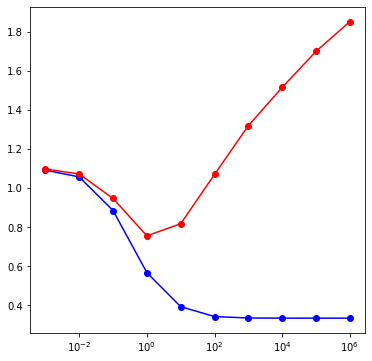

In [80]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

num_C = 10
C = [1.0] * num_C
for i in range(num_C):
    C[i] = pow(10, i-3)

logit = [None] * num_C
inv_log_likelihood_train = [0.0] * num_C
inv_log_likelihood_test = [0.0] * num_C

R2_Test = []
R2_Train = []
inv_log_likelihood_train = []
inv_log_likelihood_test = []

for i in range(num_C):
    logicReg = LogisticRegression(C=C[i],random_state=12,solver ='newton-cg', multi_class = 'multinomial')
    logicReg.fit(x_train, y_train)
    
    R2Train = logicReg.score(x_train, y_train)
    R2Test = logicReg.score(x_test, y_test)
    
    R2_Test.append(R2Test)
    R2_Train.append(R2Train)
    train_predict_probbility = logicReg.predict_proba(x_train)
    test_predict_probbility = logicReg.predict_proba(x_test)  
    
    log_loss_train = log_loss(y_train,train_predict_probbility,eps=1e-15, normalize=True, sample_weight=None, labels=None)
    log_loss_test = log_loss(y_test,test_predict_probbility,eps=1e-15, normalize=True, sample_weight=None, labels=None)
    
    inv_log_likelihood_train.append(log_loss_train)
    inv_log_likelihood_test.append(log_loss_test)
    
    print ("At C : {} ,R2 Test : {:.4f} ,R2-Train : {:.4f} ,inv_log_likelihood_train : {:.2f} , inv_log_likelihood_test : {:.2f} ".format(i,R2Test,R2Train,log_loss_train,log_loss_test))

plt.figure(figsize = (6, 6))
plt.xscale('log')
plt.plot(C, inv_log_likelihood_train, 'bo-', C, inv_log_likelihood_test, 'ro-')
plt.show()